# Incoming Instapay Transactions 

## Pre-Processing

### Data Acquisition
Imported the dataset and converted it from .xslx to .csv.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [3]:
import statsmodels.api as sm

In [4]:
df1 = pd.read_excel("C:/Users/daeni/Desktop/LOVE/PJDSC2023-CarpeDatum/PJDSC2023-CarpeDatum/Dataset/INCOMING INSTAPAY TXNS_PJDSC.xlsx")

In [5]:
df1.to_csv('INCOMING INSTAPAY TXNS_PJDSC')

---

### First and last values of the dataframe

In [6]:
df1.head()

,CUST_NUM,DATE,TIME,AMOUNT,BPI_ACCT_TYPE,SRC_BANK_NAME
0,5713.401964,2023-04-01,73591,12299.238264,SA,LEMUR
1,5713.401964,2023-04-05,44714,2499.424915,SA,HUMAN
2,5713.401964,2023-04-24,46302,748.744684,SA,HUMAN
3,5713.401964,2023-04-29,40612,1799.144167,SA,HUMAN
4,5713.401964,2023-04-29,24021,1499.628880,SA,HUMAN


In [7]:
df1.tail()

,CUST_NUM,DATE,TIME,AMOUNT,BPI_ACCT_TYPE,SRC_BANK_NAME
80037,11432.368259,2023-06-30,76309,2998.982229,SA,HUMAN
80038,9868.617026,2023-06-30,38348,7499.457892,SA,HUMAN
80039,9868.617026,2023-06-30,38465,19.806571,SA,HUMAN
80040,13968.861156,2023-06-30,51968,999.240763,SA,HUMAN
80041,5523.664001,2023-06-30,65503,9999.146908,SA,DOG


---

### Shape and Size of the Dataframe

In [8]:
df1.shape

(80042, 6)

In [9]:
df1.size

480252

---

### Finding Missing Values

In [10]:
df1.isna().head()

,CUST_NUM,DATE,TIME,AMOUNT,BPI_ACCT_TYPE,SRC_BANK_NAME
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
df1.isna().sum()

CUST_NUM         0
DATE             0
TIME             0
AMOUNT           0
BPI_ACCT_TYPE    0
SRC_BANK_NAME    0
dtype: int64

In [12]:
df1.isnull().head()

,CUST_NUM,DATE,TIME,AMOUNT,BPI_ACCT_TYPE,SRC_BANK_NAME
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [13]:
df1.isnull().sum()

CUST_NUM         0
DATE             0
TIME             0
AMOUNT           0
BPI_ACCT_TYPE    0
SRC_BANK_NAME    0
dtype: int64

---

### Basic Insights

In [14]:
df1.dtypes

CUST_NUM                float64
DATE             datetime64[ns]
TIME                      int64
AMOUNT                  float64
BPI_ACCT_TYPE            object
SRC_BANK_NAME            object
dtype: object

In [15]:
df1.describe()

,CUST_NUM,TIME,AMOUNT
count,80042.000000,80042.000000,80042.000000
mean,9529.540598,49665.994703,7222.707496
std,3318.957803,18565.417174,9930.187824
min,85.229103,0.000000,0.000000
25%,7263.799281,36280.000000,1399.106327
50%,10115.793790,50135.500000,3499.219629
75%,12362.797499,63988.000000,8899.650838
max,14140.490939,86395.000000,50000.127465


In [16]:
df1.describe(include="all")

C:\Users\daeni\AppData\Local\Temp\ipykernel_836\4174339788.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(include="all")


,CUST_NUM,DATE,TIME,AMOUNT,BPI_ACCT_TYPE,SRC_BANK_NAME
count,80042.000000,80042,80042.000000,80042.000000,80042,80042
unique,NaN,91,NaN,NaN,2,49
top,NaN,2023-05-31 00:00:00,NaN,NaN,SA,HUMAN
freq,NaN,1214,NaN,NaN,79248,41404
first,NaN,2023-04-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2023-06-30 00:00:00,NaN,NaN,NaN,NaN
mean,9529.540598,NaN,49665.994703,7222.707496,NaN,NaN
std,3318.957803,NaN,18565.417174,9930.187824,NaN,NaN
min,85.229103,NaN,0.000000,0.000000,NaN,NaN
25%,7263.799281,NaN,36280.000000,1399.106327,NaN,NaN


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80042 entries, 0 to 80041
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUST_NUM       80042 non-null  float64       
 1   DATE           80042 non-null  datetime64[ns]
 2   TIME           80042 non-null  int64         
 3   AMOUNT         80042 non-null  float64       
 4   BPI_ACCT_TYPE  80042 non-null  object        
 5   SRC_BANK_NAME  80042 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


---

## Data Wrangling

### Convert data types to proper format

In [175]:
# Convert time to the proper format. I dont know why its integers. 

### Breaking Down Categorical Variables

For the BPI Account Type: 

In [176]:
dummy_variable_1 = pd.get_dummies(df1["BPI_ACCT_TYPE"])
dummy_variable_1.rename(columns={'CA':'ACCT-TYPE-CA', 'SA':'ACCT-TYPE-SA'}, inplace=True)
dummy_variable_1.head()

,ACCT-TYPE-CA,ACCT-TYPE-SA
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [177]:
df1 = pd.concat([df1, dummy_variable_1], axis=1)
df1.drop("BPI_ACCT_TYPE", axis = 1, inplace=True)

For the Source Bank Name: 

In [178]:
pd.set_option('display.max_columns', None)

In [179]:
dummy_variable_2 = pd.get_dummies(df1["SRC_BANK_NAME"])
dummy_variable_2.head()

,ANTELOPE,BADGER,BAT,BEAR,BOBCAT,CAMEL,CAT,CHEETAH,CHIMPANZEE,COUGAR,DEER,DOG,DOLPHIN,ELEPHANT,EMU,GIRAFFE,GORILLA,HEDGEHOG,HORSE,HUMAN,HYENA,IBEX,JACKAL,KANGAROO,KOALA,LEMUR,LION,LYNX,MARMOSET,MEERKAT,MONGOOSE,MONKEY,MOOSE,OSTRICH,OTTER,RABBIT,RACCOON,SEAL,SERVAL,SHREW,SKUNK,SLOTH,SQUIRREL,TAPIR,TIGER,VOLE,WHALE,WOLF,ZEBRA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
dummy_variable_2_columns = sorted(df1["SRC_BANK_NAME"].unique())

In [ ]:
set_prefix = 'SRC-'
column_mapping = {colname: set_prefix + colname for colname in dummy_variable_2_columns}

In [182]:
dummy_variable_2.rename(columns=column_mapping, inplace=True)
dummy_variable_2.head()

,SRC-ANTELOPE,SRC-BADGER,SRC-BAT,SRC-BEAR,SRC-BOBCAT,SRC-CAMEL,SRC-CAT,SRC-CHEETAH,SRC-CHIMPANZEE,SRC-COUGAR,SRC-DEER,SRC-DOG,SRC-DOLPHIN,SRC-ELEPHANT,SRC-EMU,SRC-GIRAFFE,SRC-GORILLA,HEDGEHOG,HORSE,SRC-HUMAN,SRC-HYENA,SRC-IBEX,SRC-JACKAL,SRC-KANGAROO,SRC-KOALA,SRC-LEMUR,SRC-LION,SRC-LYNX,SRC-MARMOSET,SRC-MEERKAT,SRC-MONGOOSE,SRC-MONKEY,SRC-MOOSE,SRC-OSTRICH,SRC-OTTER,SRC-RABBIT,SRC-RACCOON,SRC-SEAL,SRC-SERVAL,SRC-SHREW,SRC-SKUNK,SRC-SLOTH,SRC-SQUIRREL,SRC-TAPIR,SRC-TIGER,SRC-VOLE,SRC-WHALE,SRC-WOLF,SRC-ZEBRA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
df1 = pd.concat([df1, dummy_variable_2], axis=1)
df1.drop(["SRC_BANK_NAME"], axis=1, inplace=True)

# Exploratory Data Analysis

In [18]:
df1["BPI_ACCT_TYPE"].value_counts()

SA    79248
CA      794
Name: BPI_ACCT_TYPE, dtype: int64

Text(0, 0.5, 'Count')

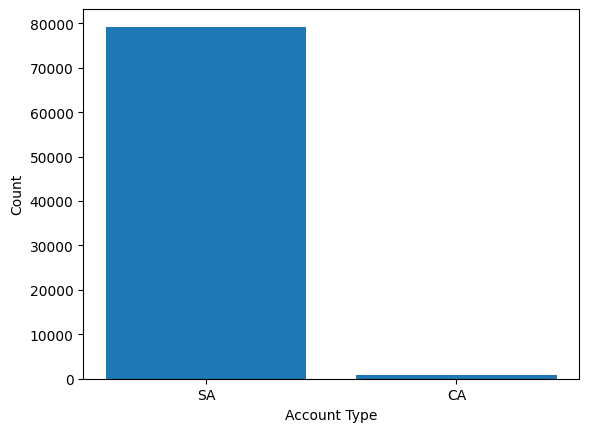

In [19]:
pyplot.bar(['SA', 'CA'], df1["BPI_ACCT_TYPE"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Account Type")
plt.pyplot.ylabel("Count")

In [20]:
source_bank_names = sorted(df1["SRC_BANK_NAME"].unique())
source_bank_names

['ANTELOPE',
 'BADGER',
 'BAT',
 'BEAR',
 'BOBCAT',
 'CAMEL',
 'CAT',
 'CHEETAH',
 'CHIMPANZEE',
 'COUGAR',
 'DEER',
 'DOG',
 'DOLPHIN',
 'ELEPHANT',
 'EMU',
 'GIRAFFE',
 'GORILLA',
 'HEDGEHOG',
 'HORSE',
 'HUMAN',
 'HYENA',
 'IBEX',
 'JACKAL',
 'KANGAROO',
 'KOALA',
 'LEMUR',
 'LION',
 'LYNX',
 'MARMOSET',
 'MEERKAT',
 'MONGOOSE',
 'MONKEY',
 'MOOSE',
 'OSTRICH',
 'OTTER',
 'RABBIT',
 'RACCOON',
 'SEAL',
 'SERVAL',
 'SHREW',
 'SKUNK',
 'SLOTH',
 'SQUIRREL',
 'TAPIR',
 'TIGER',
 'VOLE',
 'WHALE',
 'WOLF',
 'ZEBRA']

Text(0, 0.5, 'Count')

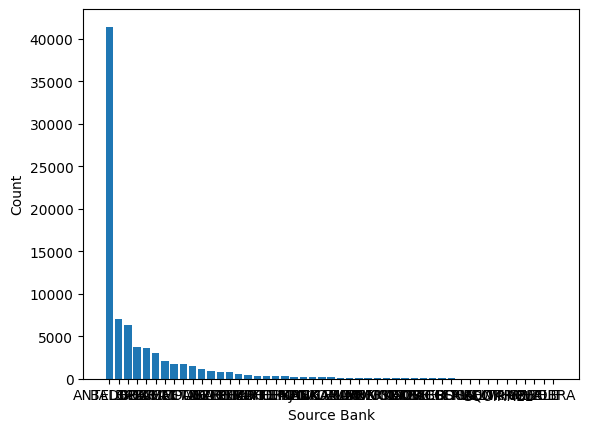

In [21]:
pyplot.bar(source_bank_names, df1["SRC_BANK_NAME"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Source Bank")
plt.pyplot.ylabel("Count")

Text(0.5, 1.0, '')

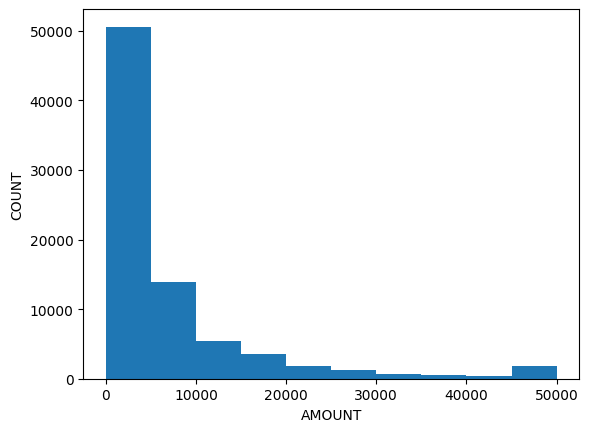

In [22]:
plt.pyplot.hist(df1["AMOUNT"])

# set x/y labels and plot title
plt.pyplot.xlabel("AMOUNT")
plt.pyplot.ylabel("COUNT")
plt.pyplot.title("")

In [48]:
bins = np.linspace(min(df1["AMOUNT"]), max(df1["AMOUNT"]), 4)
bins

array([    0.        , 16666.70915503, 33333.41831005, 50000.12746508])

In [50]:
group_names = ['Low', 'Medium', 'High']

In [52]:
df1['AMOUNT-BINNED'] = pd.cut(df1['AMOUNT'], bins, labels=group_names, include_lowest=True )
df1[['AMOUNT','AMOUNT-BINNED']].head(20)

,AMOUNT,AMOUNT-BINNED
0,12299.238264,Low
1,2499.424915,Low
2,748.744684,Low
3,1799.144167,Low
4,1499.628880,Low
5,2679.380611,Low
6,15551.210490,Low
7,14999.039449,Low
8,2999.414304,Low
9,5999.075215,Low


In [53]:
df1["AMOUNT-BINNED"].value_counts()

Low       70749
Medium     6255
High       3038
Name: AMOUNT-BINNED, dtype: int64

Text(0.5, 1.0, 'AMOUNT BINS')

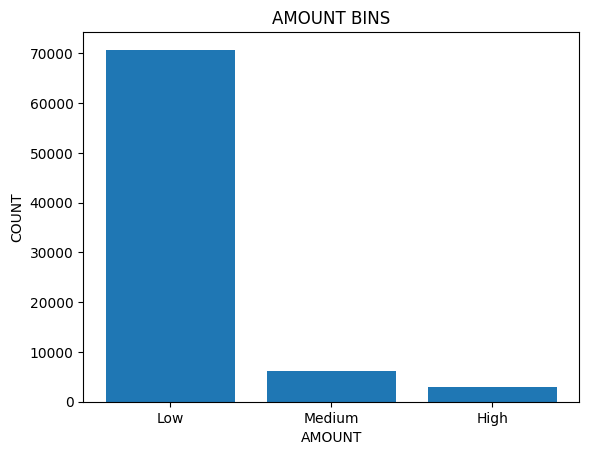

In [55]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df1["AMOUNT-BINNED"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("AMOUNT")
plt.pyplot.ylabel("COUNT")
plt.pyplot.title("AMOUNT BINS")

In [23]:
df1.corr()

C:\Users\daeni\AppData\Local\Temp\ipykernel_836\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,CUST_NUM,TIME,AMOUNT
CUST_NUM,1.000000,0.000774,0.020518
TIME,0.000774,1.000000,-0.027127
AMOUNT,0.020518,-0.027127,1.000000


<Axes: xlabel='BPI_ACCT_TYPE', ylabel='AMOUNT'>

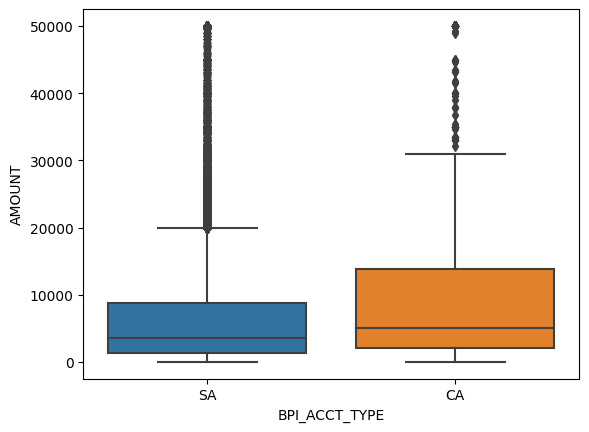

In [24]:
sns.boxplot(x="BPI_ACCT_TYPE", y="AMOUNT", data=df1)

<Axes: xlabel='SRC_BANK_NAME', ylabel='AMOUNT'>

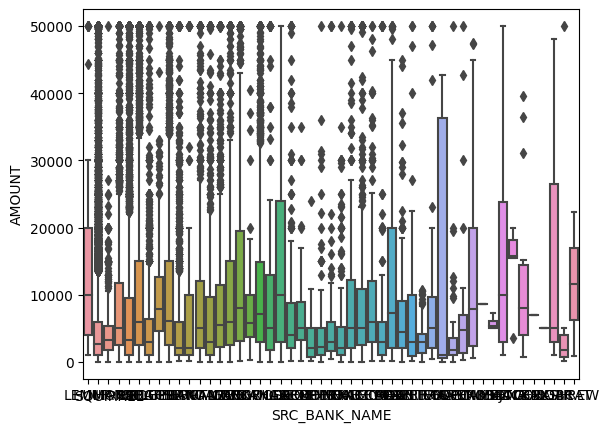

In [25]:
sns.boxplot(x="SRC_BANK_NAME", y="AMOUNT", data=df1)

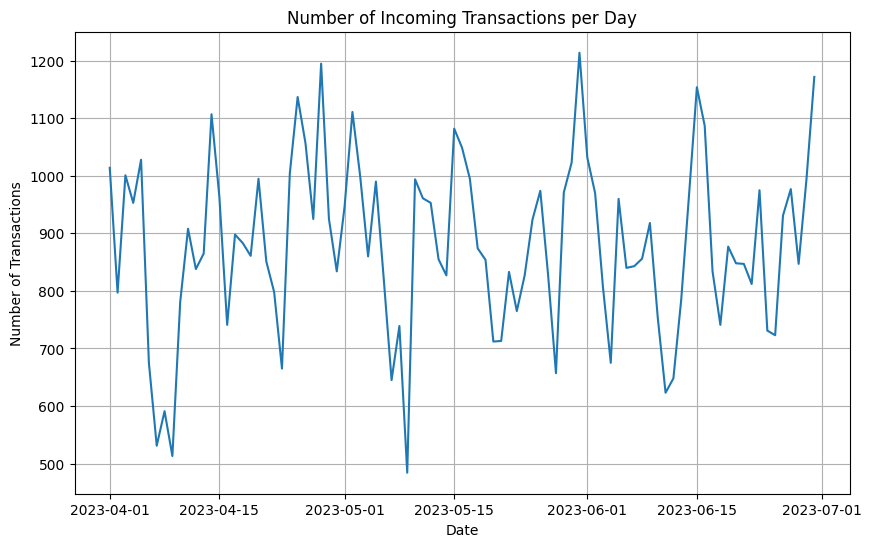

In [30]:
import matplotlib.pyplot as plt

# Group transactions by date and count the number of transactions for each day
daily_transaction_counts = df1.groupby(df1['DATE'].dt.date).size()

# Create a time series plot using pd.plot
plt.figure(figsize=(10, 6))
daily_transaction_counts.plot(grid='on')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Incoming Transactions per Day')
plt.show()

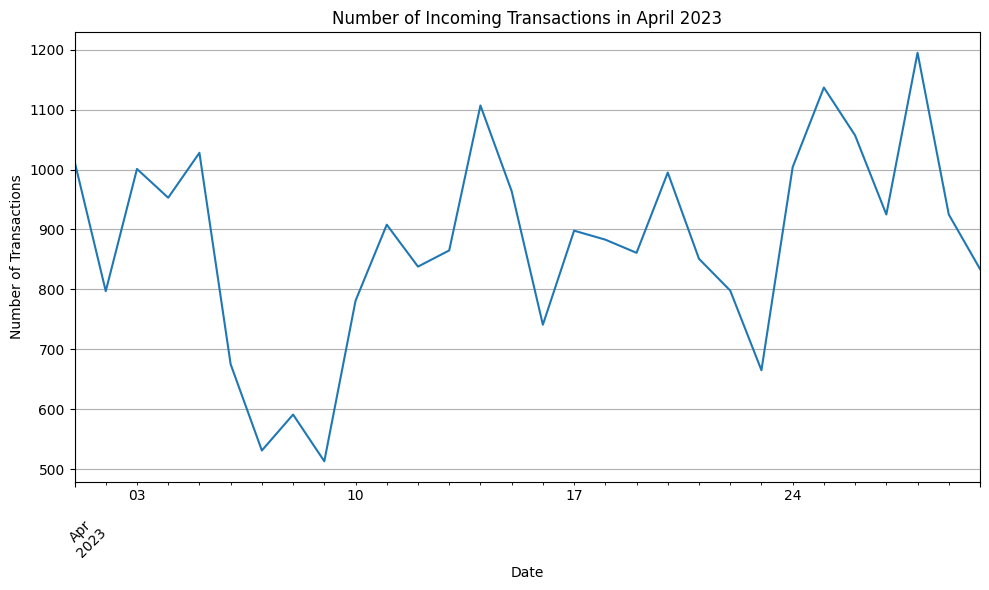

In [31]:
# Filter Transactions from April 
start_date = '2023-04-01'
end_date = '2023-04-30'
april_txns = df1[(df1['DATE'] >= start_date) & (df1['DATE'] <= end_date)]

# Group transactions by day and count the number of transactions per day
transaction_counts = april_txns.groupby(april_txns['DATE'].dt.to_period('D')).size()

# Create a bar chart
plt.figure(figsize=(10, 6))
transaction_counts.plot(grid='on')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Incoming Transactions in April 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

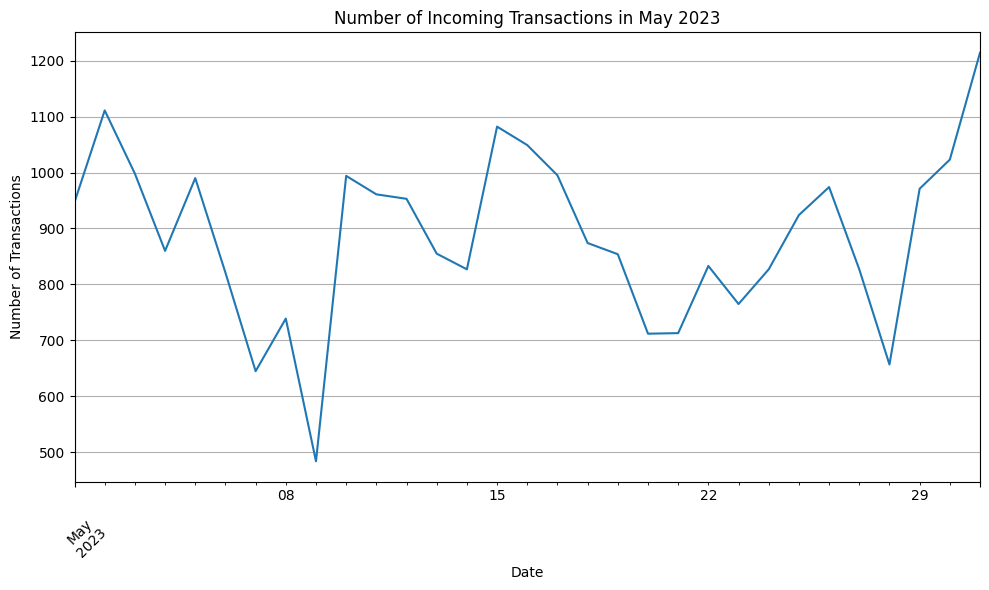

In [32]:
# Filter Transactions from May 
start_date = '2023-05-01'
end_date = '2023-05-31'
may_txns = df1[(df1['DATE'] >= start_date) & (df1['DATE'] <= end_date)]

# Group transactions by day and count the number of transactions per day
transaction_counts = may_txns.groupby(may_txns['DATE'].dt.to_period('D')).size()

# Create a bar chart
plt.figure(figsize=(10, 6))
transaction_counts.plot(grid='on')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Incoming Transactions in May 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

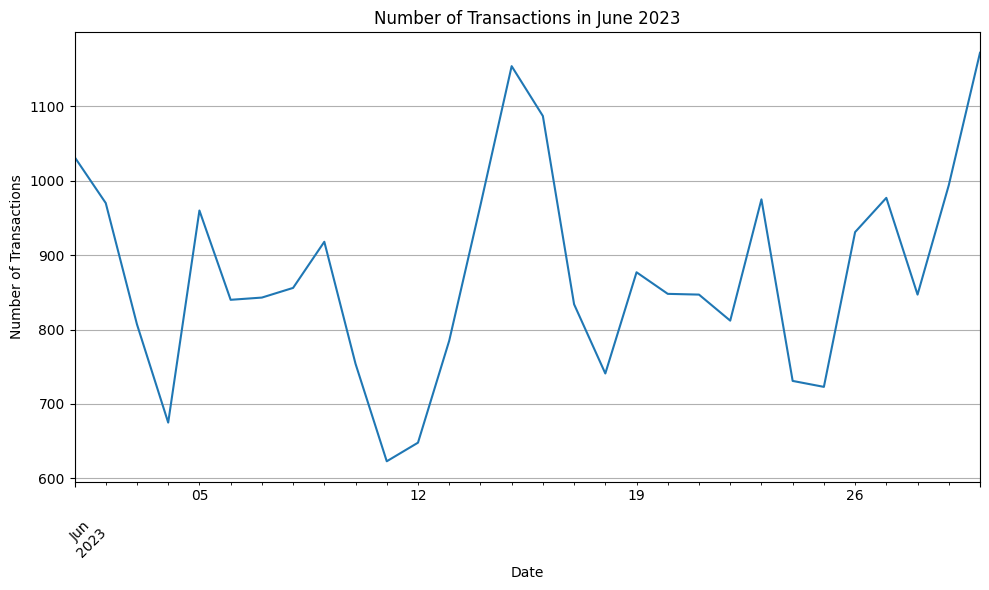

In [33]:
# Filter Transactions from May 
start_date = '2023-06-01'
end_date = '2023-06-30'
june_txns = df1[(df1['DATE'] >= start_date) & (df1['DATE'] <= end_date)]

# Group transactions by day and count the number of transactions per day
transaction_counts = june_txns.groupby(june_txns['DATE'].dt.to_period('D')).size()

# Create a bar chart
plt.figure(figsize=(10, 6))
transaction_counts.plot(grid='on')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions in June 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
df1.describe()

,CUST_NUM,TIME,AMOUNT
count,80042.000000,80042.000000,80042.000000
mean,9529.540598,49665.994703,7222.707496
std,3318.957803,18565.417174,9930.187824
min,85.229103,0.000000,0.000000
25%,7263.799281,36280.000000,1399.106327
50%,10115.793790,50135.500000,3499.219629
75%,12362.797499,63988.000000,8899.650838
max,14140.490939,86395.000000,50000.127465


In [63]:
df1.describe(include=["object"])

,BPI_ACCT_TYPE,SRC_BANK_NAME
count,80042,80042
unique,2,49
top,SA,HUMAN
freq,79248,41404


In [64]:
df1.dtypes

CUST_NUM                float64
DATE             datetime64[ns]
TIME                      int64
AMOUNT                  float64
BPI_ACCT_TYPE            object
SRC_BANK_NAME            object
AMOUNT-BINNED          category
dtype: object

In [74]:
df1_group_one = df1[['AMOUNT', 'BPI_ACCT_TYPE']]
df1_group_one = df1_group_one.groupby(['BPI_ACCT_TYPE'], as_index=False).mean()
df1_group_one

,BPI_ACCT_TYPE,AMOUNT
0,CA,11023.133600
1,SA,7184.630342


In [98]:
df1_group_two = df1[['AMOUNT', 'SRC_BANK_NAME']]
df1_group_two = df1_group_two.groupby(['SRC_BANK_NAME'], as_index=False).mean()
# df1_group_two.sort_values(['AMOUNT'], ascending=False, inplace=True)
df1_group_two

,SRC_BANK_NAME,AMOUNT
0,ANTELOPE,9352.628615
1,BADGER,14599.142365
2,BAT,5404.810570
3,BEAR,13490.432971
4,BOBCAT,7909.727707
5,CAMEL,8604.974864
6,CAT,7638.040385
7,CHEETAH,9653.137504
8,CHIMPANZEE,10163.755127
9,COUGAR,4999.336422


In [104]:
df1_group_three = df1[['AMOUNT','BPI_ACCT_TYPE','SRC_BANK_NAME']]
grouped_test1 = df1_group_three.groupby(['BPI_ACCT_TYPE','SRC_BANK_NAME'],as_index=False).mean()
grouped_test1

,BPI_ACCT_TYPE,SRC_BANK_NAME,AMOUNT
0,CA,BAT,9960.886240
1,CA,CAT,7254.684736
2,CA,CHEETAH,37838.284014
3,CA,CHIMPANZEE,21471.584517
4,CA,DEER,9618.772895
...,...,...,...
68,SA,TIGER,9954.177446
69,SA,VOLE,14439.401143
70,SA,WHALE,11049.358065
71,SA,WOLF,12944.907366


In [116]:
grouped_pivot = grouped_test1.pivot(index='BPI_ACCT_TYPE',columns='SRC_BANK_NAME')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

AMOUNT                                           \
SRC_BANK_NAME     ANTELOPE        BADGER          BAT          BEAR   
BPI_ACCT_TYPE                                                         
CA                0.000000      0.000000  9960.886240      0.000000   
SA             9352.628615  14599.142365  5374.188842  13490.432971   

                                                                    \
SRC_BANK_NAME       BOBCAT        CAMEL          CAT       CHEETAH   
BPI_ACCT_TYPE                                                        
CA                0.000000     0.000000  7254.684736  37838.284014   
SA             7909.727707  8604.974864  7640.439766   9207.522539   

                                          ...                             \
SRC_BANK_NAME    CHIMPANZEE       COUGAR  ...         SHREW        SKUNK   
BPI_ACCT_TYPE                             ...                              
CA             21471.584517     0.000000  ...      0.000000     0.000000   
SA              9926.631575  4999.336422  ...  11614.129182  7445.404538   

                                                                    \
SRC_BANK_NAME        SLOTH    SQUIRREL         TAPIR         TIGER   
BPI_ACCT_TYPE                                                        
CA                0.000000  5043.53001      0.000000  17437.586226   
SA             8006.731186  4493.57040  18025.633057   9954.177446   

                                                                      
SRC_BANK_NAME          VOLE         WHALE          WOLF        ZEBRA  
BPI_ACCT_TYPE                                                         
CA                 0.000000   9560.929457  39499.100786     0.000000  
SA             14439.401143  11049.358065  12944.907366  3323.879773  

[2 rows x 49 columns]

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline 

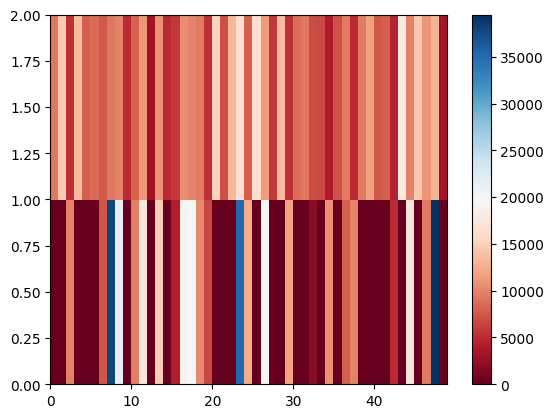

In [118]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

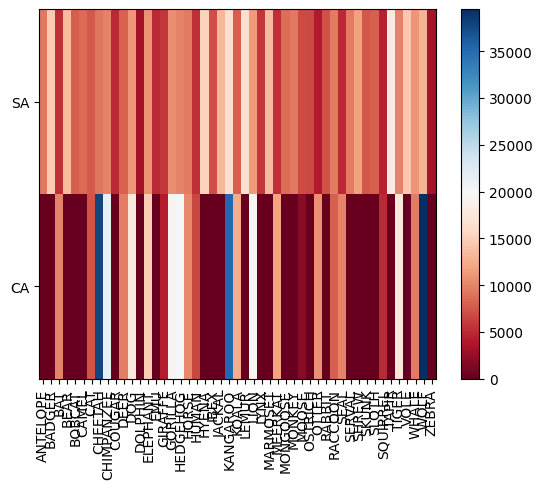

In [119]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()